In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [24]:
df_prev = pd.read_csv('previous_application.csv')
df_app = pd.read_csv('application_data.csv')

In [25]:
df_prev.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.shape

(1670214, 37)

In [5]:
df.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,...,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,...,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,...,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,...,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115834,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,...,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,...,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,...,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,...,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,...,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


As its a huge dataset, It'll be better to calculate the missing value percentage for each feature

In [7]:
total_record = df.shape[0]

for col in df.columns:
    missing_record = df[col].isnull().sum()
    print("Name of the feature is: ",col)
    percentage_missing = (missing_record/total_record)*100
    print("the missing percentage of the feature: ", percentage_missing)   

Name of the feature is:  SK_ID_PREV
the missing percentage of the feature:  0.0
Name of the feature is:  SK_ID_CURR
the missing percentage of the feature:  0.0
Name of the feature is:  NAME_CONTRACT_TYPE
the missing percentage of the feature:  0.0
Name of the feature is:  AMT_ANNUITY
the missing percentage of the feature:  22.286665062081866
Name of the feature is:  AMT_APPLICATION
the missing percentage of the feature:  0.0
Name of the feature is:  AMT_CREDIT
the missing percentage of the feature:  5.9872567227912114e-05
Name of the feature is:  AMT_DOWN_PAYMENT
the missing percentage of the feature:  53.636480115721696
Name of the feature is:  AMT_GOODS_PRICE
the missing percentage of the feature:  23.08177275486854
Name of the feature is:  WEEKDAY_APPR_PROCESS_START
the missing percentage of the feature:  0.0
Name of the feature is:  HOUR_APPR_PROCESS_START
the missing percentage of the feature:  0.0
Name of the feature is:  FLAG_LAST_APPL_PER_CONTRACT
the missing percentage of the 

In [5]:
missing_percent_row = df.isnull().sum(axis = 1)/df.shape[1]

In [16]:
missing_percent_row

0          0.027027
1          0.108108
2          0.108108
3          0.135135
4          0.297297
             ...   
1670209    0.081081
1670210    0.054054
1670211    0.054054
1670212    0.108108
1670213    0.108108
Length: 1670214, dtype: float64

In [24]:
type(missing_percent_row)

pandas.core.series.Series

In [15]:
missing_percent_row[0]

0.02702702702702703

In [17]:
len(missing_percent_row)

1670214

In [33]:
# for i in range(0, len(missing_percent_row)):
#     if missing_percent_row[i] > 0.40:
#         print(missing_percent_row[i])
    

In [8]:
missing_percent_row.dtype

dtype('float64')

In [34]:
df.dropna(subset=['AMT_CREDIT', 'PRODUCT_COMBINATION'], inplace = True )

In [6]:
numeric_df = []
for col in df.columns:
    if(df[col].dtype == float or df[col].dtype == int):
        numeric_df.append(col)

In [7]:
numeric_df

['AMT_ANNUITY',
 'AMT_APPLICATION',
 'AMT_CREDIT',
 'AMT_DOWN_PAYMENT',
 'AMT_GOODS_PRICE',
 'RATE_DOWN_PAYMENT',
 'RATE_INTEREST_PRIMARY',
 'RATE_INTEREST_PRIVILEGED',
 'CNT_PAYMENT',
 'DAYS_FIRST_DRAWING',
 'DAYS_FIRST_DUE',
 'DAYS_LAST_DUE_1ST_VERSION',
 'DAYS_LAST_DUE',
 'DAYS_TERMINATION',
 'NFLAG_INSURED_ON_APPROVAL']

In [9]:
type(numeric_df)

list

In [11]:
new_numeric_df = pd.DataFrame()

In [13]:
for col in numeric_df:
    new_numeric_df[col] = df_prev[col]

In [14]:
new_numeric_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 15 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   AMT_ANNUITY                1297979 non-null  float64
 1   AMT_APPLICATION            1670214 non-null  float64
 2   AMT_CREDIT                 1670213 non-null  float64
 3   AMT_DOWN_PAYMENT           774370 non-null   float64
 4   AMT_GOODS_PRICE            1284699 non-null  float64
 5   RATE_DOWN_PAYMENT          774370 non-null   float64
 6   RATE_INTEREST_PRIMARY      5951 non-null     float64
 7   RATE_INTEREST_PRIVILEGED   5951 non-null     float64
 8   CNT_PAYMENT                1297984 non-null  float64
 9   DAYS_FIRST_DRAWING         997149 non-null   float64
 10  DAYS_FIRST_DUE             997149 non-null   float64
 11  DAYS_LAST_DUE_1ST_VERSION  997149 non-null   float64
 12  DAYS_LAST_DUE              997149 non-null   float64
 13  DAYS_TERMINA

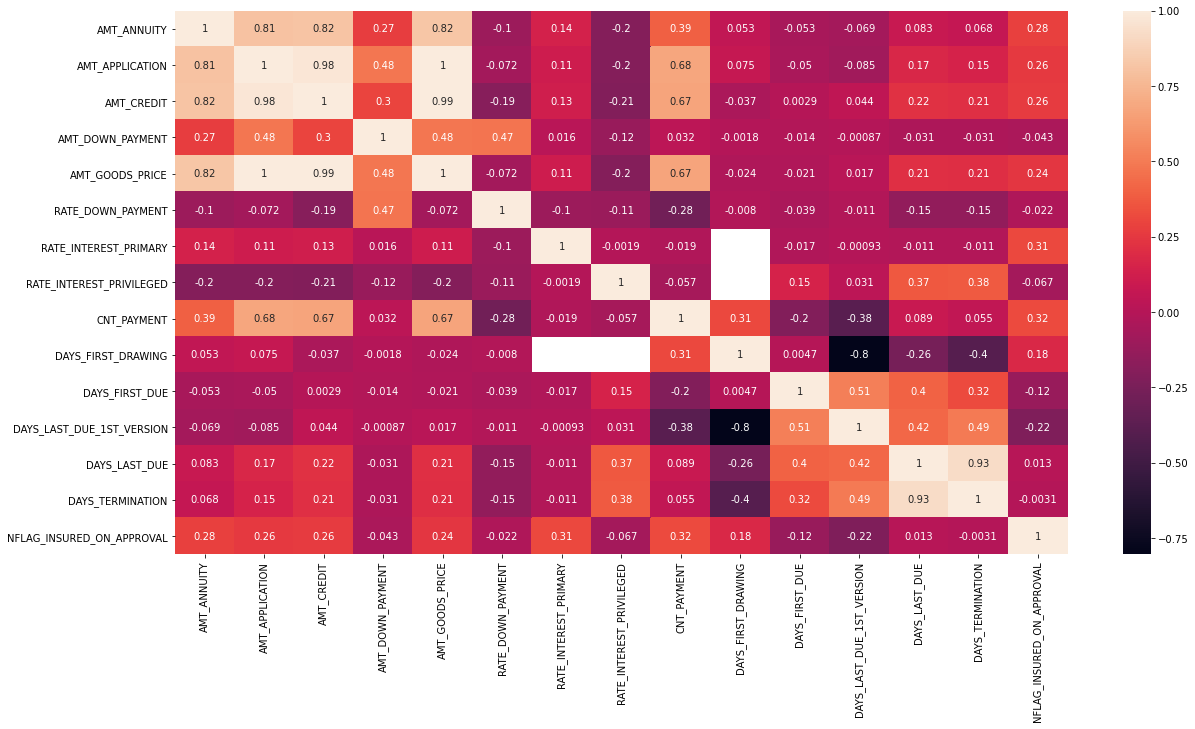

In [20]:
plt.figure(figsize = (20, 10))
sns.heatmap(new_numeric_df.corr(), annot =True)
plt.show()

merging the datasets to compare with previous applicants

In [29]:
merged = pd.merge(df_app[['SK_ID_CURR', 'TARGET']], df_prev, how='left', on=['SK_ID_CURR'])

In [30]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1430155 entries, 0 to 1430154
Data columns (total 38 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_CURR                   1430155 non-null  int64  
 1   TARGET                       1430155 non-null  int64  
 2   SK_ID_PREV                   1413701 non-null  float64
 3   NAME_CONTRACT_TYPE           1413701 non-null  object 
 4   AMT_ANNUITY                  1106483 non-null  float64
 5   AMT_APPLICATION              1413701 non-null  float64
 6   AMT_CREDIT                   1413700 non-null  float64
 7   AMT_DOWN_PAYMENT             664161 non-null   float64
 8   AMT_GOODS_PRICE              1094176 non-null  float64
 9   WEEKDAY_APPR_PROCESS_START   1413701 non-null  object 
 10  HOUR_APPR_PROCESS_START      1413701 non-null  float64
 11  FLAG_LAST_APPL_PER_CONTRACT  1413701 non-null  object 
 12  NFLAG_LAST_APPL_IN_DAY       1413701 non-n

In [31]:
merged.describe()

,SK_ID_CURR,TARGET,SK_ID_PREV,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,...,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.430155e+06,1.430155e+06,1.413701e+06,1.106483e+06,1.413701e+06,1.413700e+06,6.641610e+05,1.094176e+06,1.413701e+06,1.413701e+06,...,4791.000000,1.413701e+06,1.413701e+06,1.106488e+06,852595.000000,852595.000000,852595.000000,852595.000000,852595.000000,852595.000000
mean,2.784702e+05,8.624240e-02,1.922744e+06,1.583718e+04,1.752436e+05,1.963541e+05,6.655317e+03,2.264512e+05,1.247893e+01,9.964321e-01,...,0.771284,-8.803670e+02,3.149878e+02,1.605194e+01,342257.656710,13488.741567,33274.831806,76665.634755,82353.171672,0.330572
std,1.028021e+05,2.807218e-01,5.327153e+05,1.472491e+04,2.936222e+05,3.194813e+05,2.062030e+04,3.159376e+05,3.331474e+00,5.962560e-02,...,0.100644,7.835402e+02,7.695082e+03,1.456675e+01,88832.266598,71650.147146,106161.775933,149704.716371,153537.064274,0.470419
min,1.000020e+05,0.000000e+00,1.000001e+06,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,...,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.893610e+05,0.000000e+00,1.461346e+06,6.257858e+03,1.975050e+04,2.488050e+04,0.000000e+00,4.982850e+04,1.000000e+01,1.000000e+00,...,0.715645,-1.313000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1630.000000,-1244.000000,-1316.000000,-1269.000000,0.000000
50%,2.789560e+05,0.000000e+00,1.922698e+06,1.122376e+04,7.087050e+04,8.059500e+04,1.791000e+03,1.102455e+05,1.200000e+01,1.000000e+00,...,0.835095,-5.820000e+02,4.000000e+00,1.200000e+01,365243.000000,-825.000000,-358.000000,-534.000000,-494.000000,0.000000
75%,3.675090e+05,0.000000e+00,2.384012e+06,2.042078e+04,1.800000e+05,2.156400e+05,7.695000e+03,2.295000e+05,1.500000e+01,1.000000e+00,...,0.852537,-2.710000e+02,8.500000e+01,2.400000e+01,365243.000000,-408.000000,135.000000,-73.000000,-42.000000,1.000000
max,4.562550e+05,1.000000e+00,2.845381e+06,4.180581e+05,5.850000e+06,4.509688e+06,3.060045e+06,5.850000e+06,2.300000e+01,1.000000e+00,...,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


C:\Users\ksk76\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


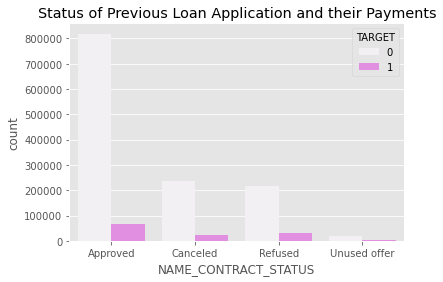

In [50]:
plt.style.use("ggplot")
plt.title("Status of Previous Loan Application and their Payments")
sns.countplot(merged['NAME_CONTRACT_STATUS'], hue=merged['TARGET'], color = "violet")
plt.show()

Percentage of previously approved loan applicants that come under category-1(late payment clients) in current loan

In [32]:
total_approved = merged[merged['NAME_CONTRACT_STATUS'] == "Approved"].shape[0]
cat1_approved = merged[(merged['TARGET'] == 1) & (merged['NAME_CONTRACT_STATUS'] == "Approved")].shape[0]

In [34]:
print("Percentage of previously approved loan applicants that came under category-1 in current loan : ", (cat1_approved*100/total_approved))

Percentage of previously approved loan applicants that came under category-1 in current loan :  7.588655443691958


These many applicants who were previously approved in previous loan data, now are facing difficulties and making late payments : 7.588655443691958 

Percentage of previously refused loan(that came under category-1) applicants that were able to pay current loan

In [68]:
total_refused = merged[merged['NAME_CONTRACT_STATUS'] == "Refused"].shape[0]
cat2_refused = merged[(merged['TARGET'] == 0) & (merged['NAME_CONTRACT_STATUS'] == "Refused")].shape[0]

In [69]:
print("Percentage of previously refused loan applicants that were able to pay current loan : ", (cat2_refused
                                                                                                 *100/total_refused))

Percentage of previously refused loan applicants that were able to pay current loan :  88.00358612820408


The applicants whose loans were previously approved more likely to pay for the current application (90% chances)

C:\Users\ksk76\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ksk76\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


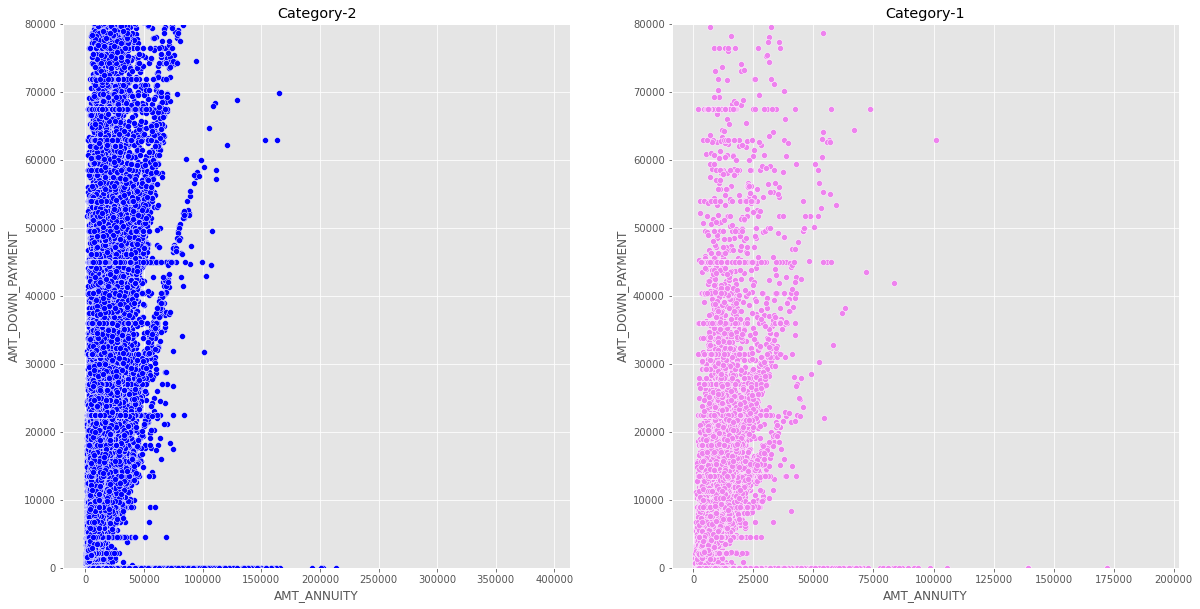

In [73]:
fig = plt.figure(figsize=(20,10))

ax1 = fig.add_subplot(1, 2, 1, ylim=(0,80000), title="Category-2")
ax2 = fig.add_subplot(1, 2, 2, ylim=(0,80000), title="Category-1")

sns.scatterplot(merged[merged["TARGET"] == 0]['AMT_ANNUITY'], merged[merged["TARGET"] == 0]['AMT_DOWN_PAYMENT'], ax=ax1, color = "blue")
sns.scatterplot(merged[merged["TARGET"] == 1]['AMT_ANNUITY'], merged[merged["TARGET"] == 1]['AMT_DOWN_PAYMENT'], ax=ax2, color = "violet")

plt.show()

Category-2 applicants are less for larger amount of annuity of previous application.
For higher down payment, Category-1 are less.